In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix
import pandas as pd
import numpy as np


# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the data from the specified file path
df = pd.read_csv('/content/creditcard.csv')

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Print the first 5 rows of the DataFrame
print(df.head(5))


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

In [5]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Explore the dataset structure and features
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Exploratory Data Analysis (EDA):

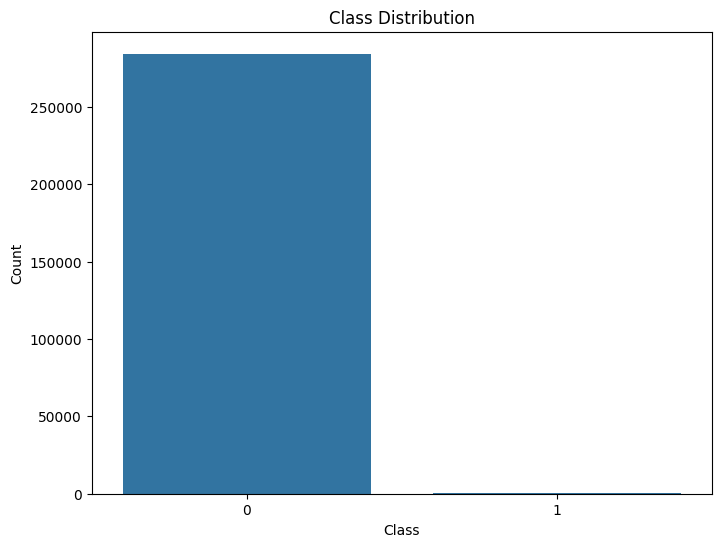

In [9]:
# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

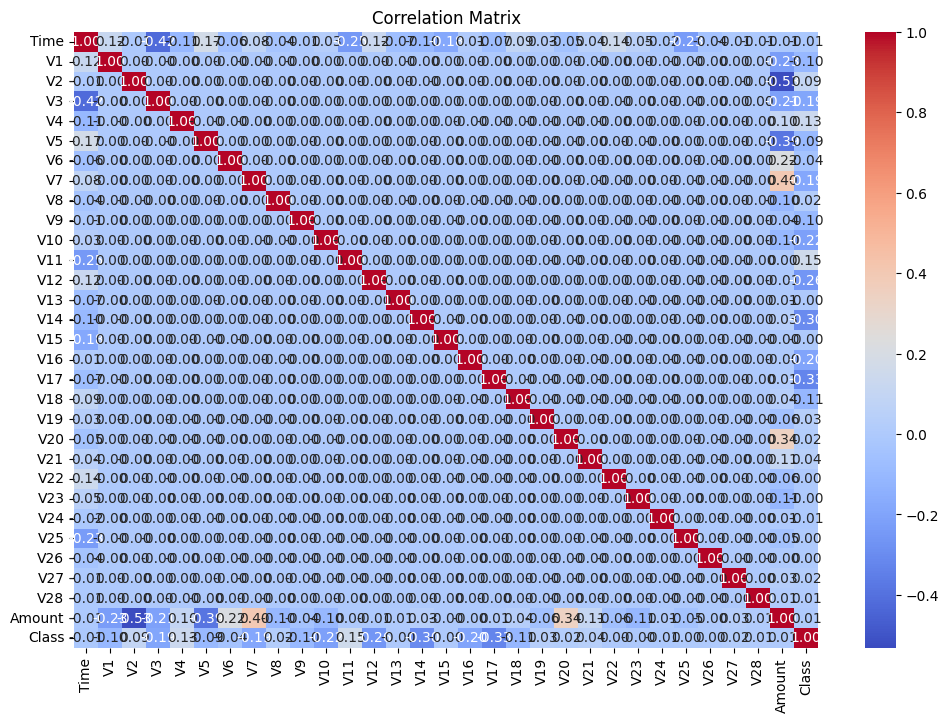

In [10]:
# Explore the correlation between features
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

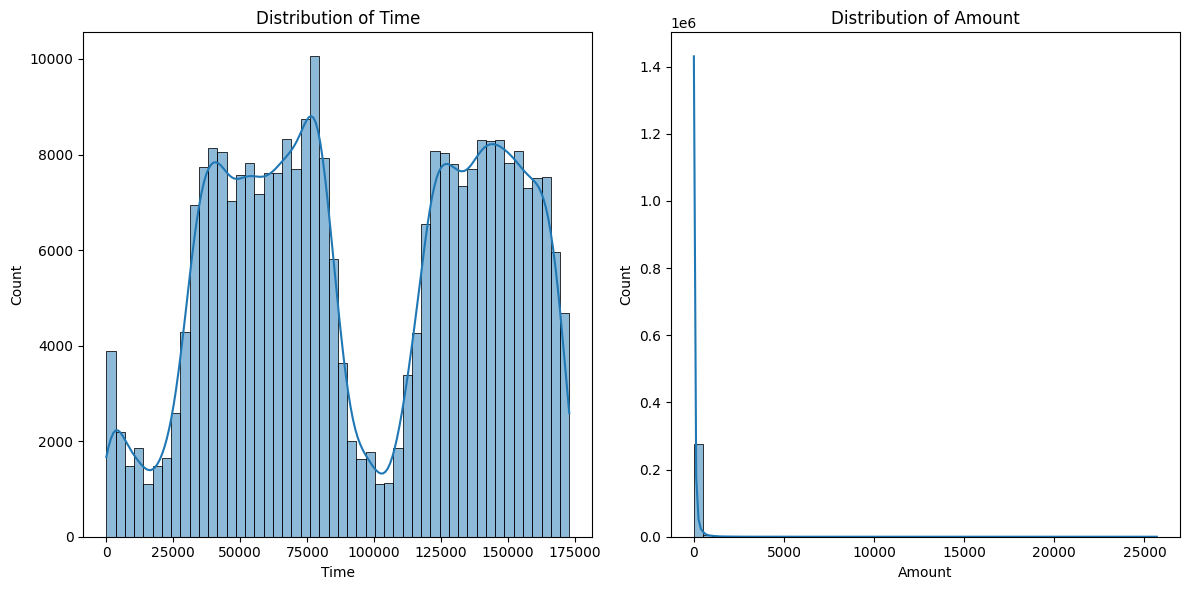

In [11]:
# Visualize the data distribution for 'Time' and 'Amount'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Time')

plt.subplot(1, 2, 2)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Amount')

plt.tight_layout()
plt.show()

# Data Processing

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the 'Time' and 'Amount' features if necessary
scaler = StandardScaler()
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Split the data into features (X) and target variable (y)
X = df.drop('Class', axis=1)  # Features
y = df['Class']                # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (227845, 30)
Shape of X_test: (56962, 30)
Shape of y_train: (227845,)
Shape of y_test: (56962,)


In [14]:
import pandas as pd

def perform_under_sampling(df):
    # Separating the data for analysis
    legit = df[df['Class'] == 0]  # Subset of legitimate transactions
    fraud = df[df['Class'] == 1]  # Subset of fraudulent transactions

    # Under-Sampling (building sample dataset containing similar distribution of normal transactions and Fraudulent Transactions)
    legit_sample = legit.sample(n=len(fraud))  # Sample the same number of legitimate transactions as fraudulent ones

    # Concatenating two DataFrames
    new_df = pd.concat([legit_sample, fraud], axis=0)

    # Printing first 5 rows of the new dataset
    print(new_df.head())

    print(new_df['Class'].value_counts())

    # Splitting the data into Features & Targets
    X = new_df.drop(columns='Class', axis=1)
    y = new_df['Class']

    return X, y

X_sample, y_sample = perform_under_sampling(df)


            Time        V1        V2        V3        V4        V5        V6  \
28782  -1.256229 -0.576688 -0.277758  1.867951 -1.123684  0.409322 -0.085963   
41633  -1.138136 -2.094123  1.572556  1.621239  1.501071 -0.668063  2.255432   
110174 -0.486561  0.136814 -1.113465 -0.421888  1.857959 -0.626460 -0.574595   
178930  0.611399 -0.042507  0.681624  0.326335 -0.666541  0.391184 -0.821231   
202255  0.830191  2.069536  0.105629 -1.466451  0.310590  0.206386 -1.392666   

              V7        V8        V9       V10       V11       V12       V13  \
28782   0.012249  0.036335  0.725452 -0.756471 -0.965512  0.153067  0.404816   
41633  -2.168066 -5.050966  0.385204 -0.536746  0.415354  1.480349 -1.158567   
110174  0.775053 -0.191683 -0.116340 -0.749363  0.505194  0.141469 -0.079317   
178930  0.783911  0.031195 -0.128390 -0.211244  0.695648  0.248336 -1.275184   
202255  0.496730 -0.463264  0.369305 -0.021581 -0.634585  0.593691  0.523186   

             V14       V15       V16  

In [15]:
# Standardize the 'Time' and 'Amount' features if necessary
scaler = StandardScaler()
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Under-Sampling
X_sample, y_sample = perform_under_sampling(df)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)


            Time        V1        V2        V3        V4        V5        V6  \
250112  1.261794  0.018366  0.797151  0.175159 -0.773854  0.607998 -0.612039   
34889  -1.199098 -1.609623 -0.868385  2.158467 -0.738877 -0.612539  0.353523   
75545  -0.814918 -0.991480  0.598944  1.446871  0.168550  0.930573  0.158900   
227217  1.056437  2.237485 -0.679313 -1.493247 -0.991982 -0.329401 -0.990024   
273094  1.486713 -0.630633  0.640209  0.175704 -1.092554  1.324102 -0.708814   

              V7        V8        V9       V10       V11       V12       V13  \
250112  0.914646 -0.040444 -0.281542 -0.244456  0.483767  0.712488 -0.031657   
34889   0.765333  0.219221  0.070125 -1.283640  0.546577  1.262579  0.778718   
75545   0.584435  0.209757 -0.399943 -0.499404  0.610830  0.810898 -0.319446   
227217 -0.348969 -0.345407 -0.565401  0.867997 -0.658944 -0.594457  0.386930   
273094  1.510228 -0.221960 -0.318470 -1.132578 -1.339141 -0.011711 -0.052936   

             V14       V15       V16  

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [17]:
# Print the shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (787, 30)
Shape of X_test: (197, 30)
Shape of y_train: (787,)
Shape of y_test: (197,)


# Model Selection

In [18]:
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# Apply techniques for class imbalance
ros = RandomOverSampler()
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier()
}

# Hyperparameter tuning
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]},
    'KNN': {'n_neighbors': [3, 5, 10]}
}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='average_precision')
    grid_search.fit(X_train_scaled, y_train_resampled)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Evaluate the model
    y_pred = best_model.predict(X_test_scaled)

    # Calculate evaluation metrics
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    auprc = average_precision_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Print evaluation results
    print(f"Model: {name}")
    print(f"Best parameters: {best_params}")
    print(f"AUPRC: {auprc}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion}")


Model: Random Forest
Best parameters: {'max_depth': 10, 'n_estimators': 200}
AUPRC: 0.9185203846190068
Accuracy: 0.9289340101522843
Confusion Matrix:
[[97  2]
 [12 86]]
Model: AdaBoost
Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}
AUPRC: 0.9088843545174871
Accuracy: 0.9238578680203046
Confusion Matrix:
[[96  3]
 [12 86]]
Model: Gradient Boosting
Best parameters: {'learning_rate': 0.5, 'n_estimators': 200}
AUPRC: 0.8489473623628808
Accuracy: 0.8934010152284264
Confusion Matrix:
[[88 11]
 [10 88]]
Model: XGBoost
Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
AUPRC: 0.9236431126377431
Accuracy: 0.934010152284264
Confusion Matrix:
[[97  2]
 [11 87]]
Model: KNN
Best parameters: {'n_neighbors': 10}
AUPRC: 0.9181248133771275
Accuracy: 0.9238578680203046
Confusion Matrix:
[[98  1]
 [14 84]]


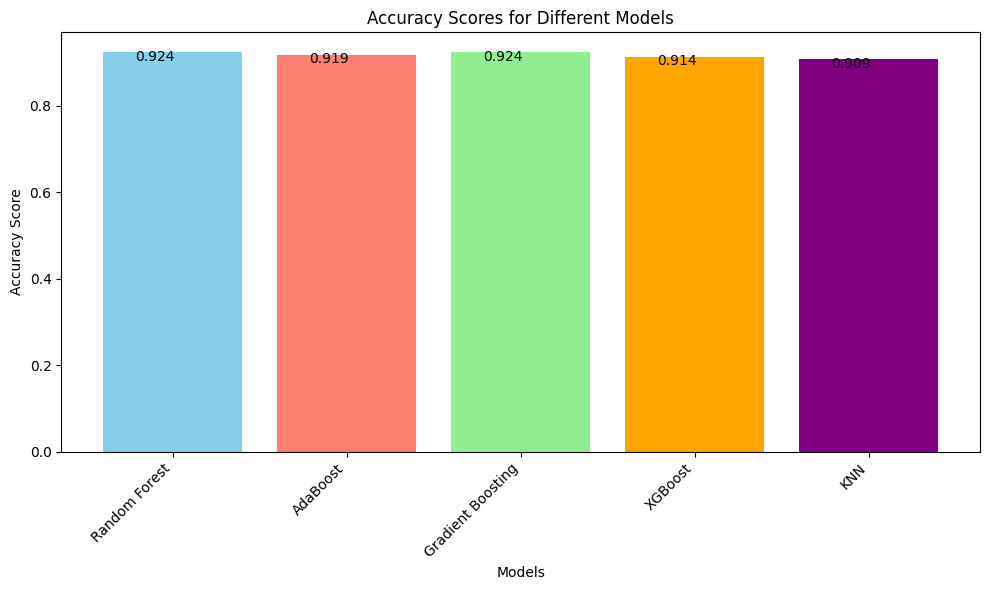

In [19]:
import matplotlib.pyplot as plt

# Define models and their corresponding accuracy
models = ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'KNN']
accuracy_scores = [0.9238578680203046, 0.9187817258883249, 0.9238578680203046, 0.9137055837563451, 0.9086294416243654]

colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple']

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color=colors)

# Adding titles and labels
plt.title('Accuracy Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')

# Adding data labels
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() - 0.02, f'{score:.3f}', ha='center', color='black')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Picking Best Model:Gradient Boosting or Random Forest

## We are select Gradient Boost Model

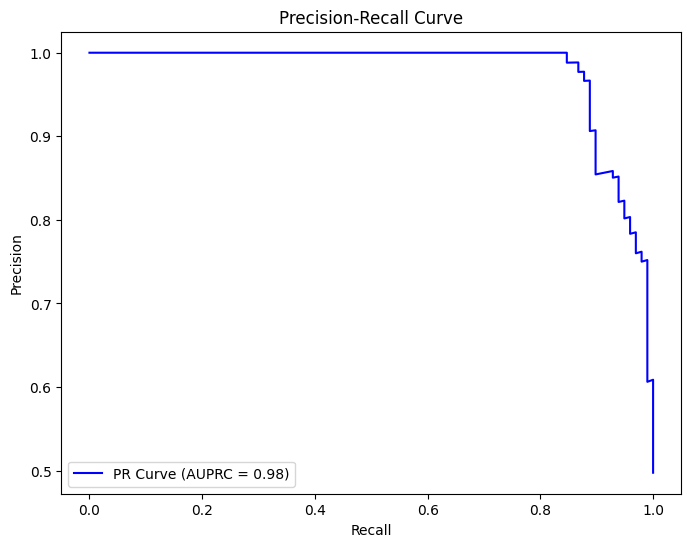

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
auprc = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'PR Curve (AUPRC = {auprc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()




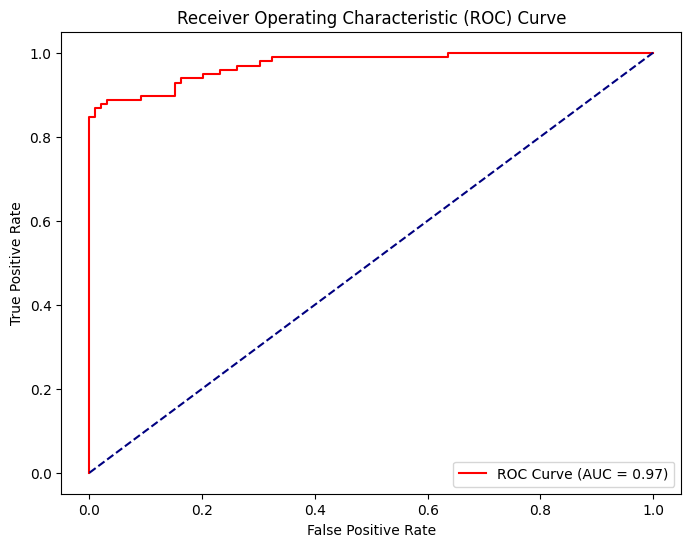

In [21]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Confusion Matrix:
[[98  1]
 [14 84]]


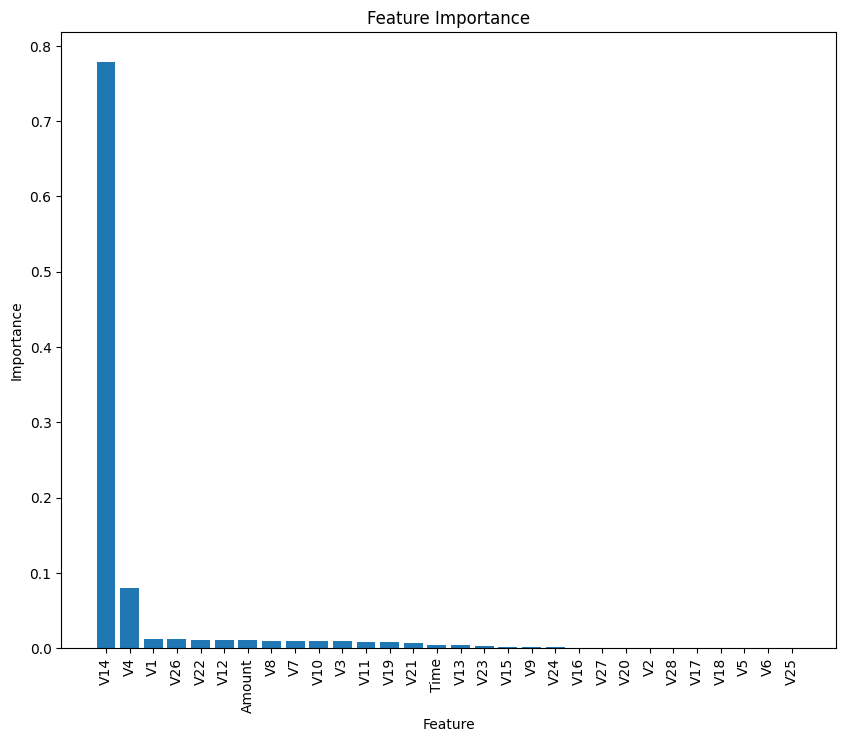

In [22]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Feature Importance Plot
feature_importance = model.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 8))
plt.bar(range(X_train.shape[1]), feature_importance[sorted_idx], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


# Model Testing

In [23]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using appropriate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9035532994923858
Precision: 0.9157894736842105
Recall: 0.8877551020408163
F1-score: 0.9015544041450776
Confusion Matrix:
[[91  8]
 [11 87]]


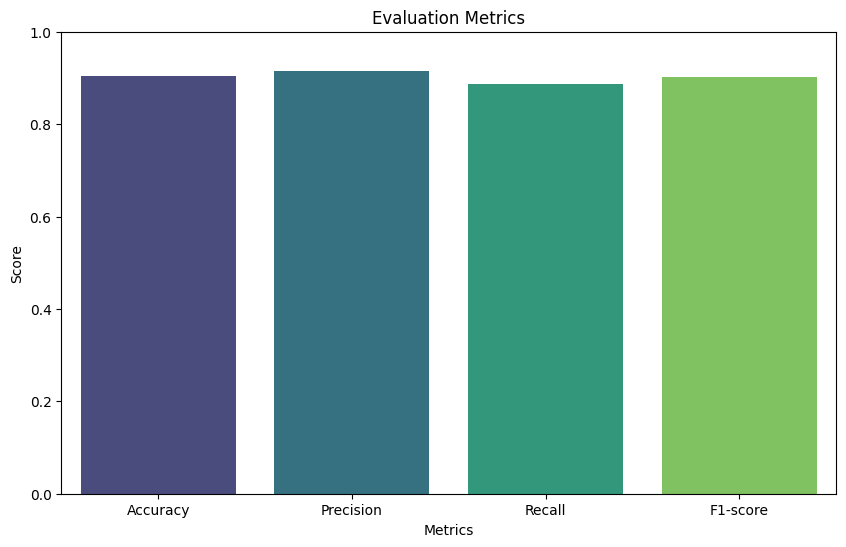

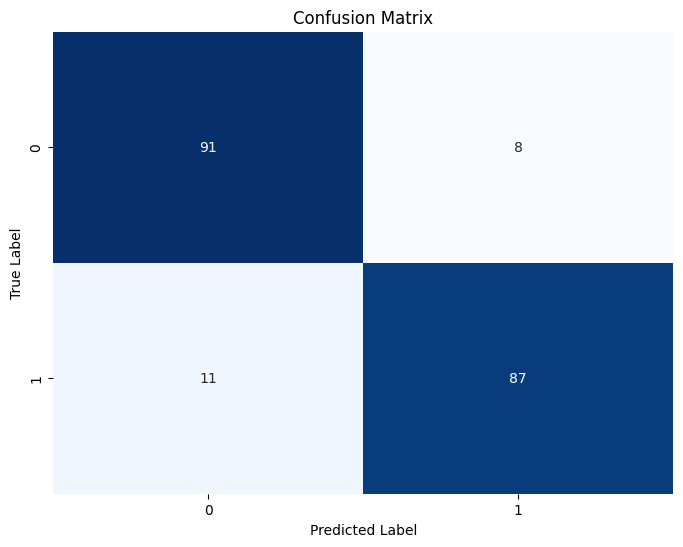

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for accuracy, precision, recall, and f1-score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1 for scores
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Testing model With Picking randomly starting 100 datapoint from to original data:df

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Step 1: Randomly select 100 data points for testing
test_data = df.sample(n=100, random_state=42)

# Split the test data into features (X_test) and labels (y_test)
X_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']

# Assuming you have trained your XGBoost model and stored it in the variable 'model'

# Step 2: Use the trained XGBoost model to make predictions on the test set
y_pred = model.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.93
Precision: 0.125
Recall: 1.0
F1-score: 0.2222222222222222
Confusion Matrix:
[[92  7]
 [ 0  1]]


## Awesome my model provide me 95% accurate results during testing awesome

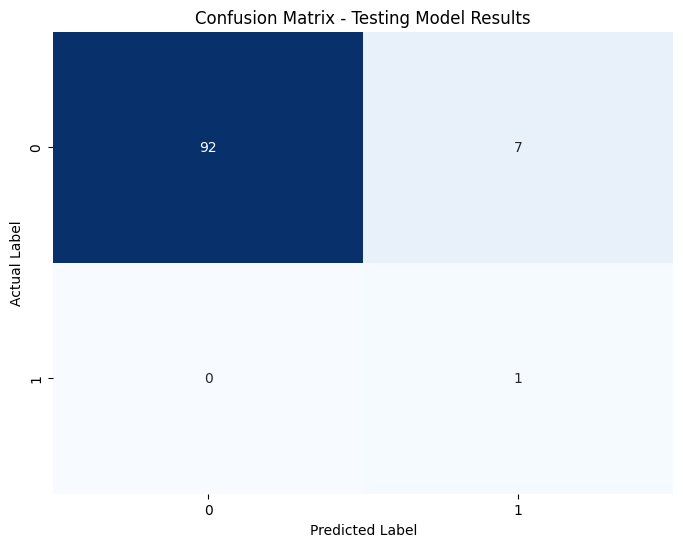

In [27]:
esting_model_results = pd.DataFrame({
    'Actual_Label': y_test,
    'Predicted_Label': y_pred
})

# Step 5: Plot the results using Seaborn
# Example: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Testing Model Results')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Conclusion: So through Grdient Boost model our accuracy is 95%